In [2]:
#import open3d
#import torch
#import cv2
import glob
import trimesh
import argparse
import pymesh
import numpy as np
from pymesh import load_mesh, save_mesh, form_mesh


In [33]:
!ls dataset/modelnet40_off_aligned

#!conda install -c conda-forge trimesh -n ys
#!wget http://modelnet.cs.princeton.edu/ModelNet40.zip
#!wget --no-check-certificate https://lmb.informatik.uni-freiburg.de/resources/datasets/ORION/modelnet40_manually_aligned.tar

ls: cannot access 'dataset/modelnet40_off_aligned': No such file or directory


In [3]:
category = 'car'
offs = glob.glob('dataset/modelnet40_off_aligned/%s/train/*.off'%category)
annots = [x +'.annot' for x in offs]

index = 15
cur_off = offs[index]
cur_annot = annots[index]
print(cur_off)
f = open(annots[index],'r')
f.readlines()


dataset/modelnet40_off_aligned/car/train/car_0108.off


['0.000000\n', '0.000000\n']

In [4]:
mesh = trimesh.load(cur_off,process=False)
mesh.show()

/home/mmvc/.conda/envs/ys/lib/python3.6/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [5]:
in_mesh = load_mesh(offs[index]);
print(in_mesh.num_vertices, in_mesh.num_faces, in_mesh.num_voxels)
in_mesh.add_attribute("vertex_normal");
v_normals = in_mesh.get_vertex_attribute("vertex_normal");

out_mesh = form_mesh(in_mesh.vertices, np.zeros((0, 3), dtype=int));
out_mesh.add_attribute("nx");
out_mesh.add_attribute("ny");
out_mesh.add_attribute("nz");

avg_x = np.sum(v_normals[:,0].ravel())/in_mesh.num_vertices
avg_y = np.sum(v_normals[:,1].ravel())/in_mesh.num_vertices
avg_z = np.sum(v_normals[:,2].ravel())/in_mesh.num_vertices
#max,min +-1
#what if
print(avg_x,avg_y,avg_z)
radius_gen_points = 1.0/150



out_mesh.set_attribute("nx", v_normals[:,0].ravel());
out_mesh.set_attribute("ny", v_normals[:,1].ravel());
out_mesh.set_attribute("nz", v_normals[:,2].ravel());

out_name = offs[index][:-4]+'.ply'
print(out_name)

#save_mesh(out_name, out_mesh, "nx", "ny", "nz");

53468 48849 0
-0.0379829856663407 4.7832177038535116e-05 0.04394280684636438
dataset/modelnet40_off_aligned/car/train/car_0108.ply


In [57]:
mesh = pymesh.load_mesh(out_name)
print(mesh.num_vertices, mesh.num_faces, mesh.num_voxels)

def generate_neighbor_point(x,y,z):
    
    

53468 0 0


In [53]:
!ls dataset/modelnet40_off_aligned/car/train/ | grep ply

car_0082.ply
car_0108.ply


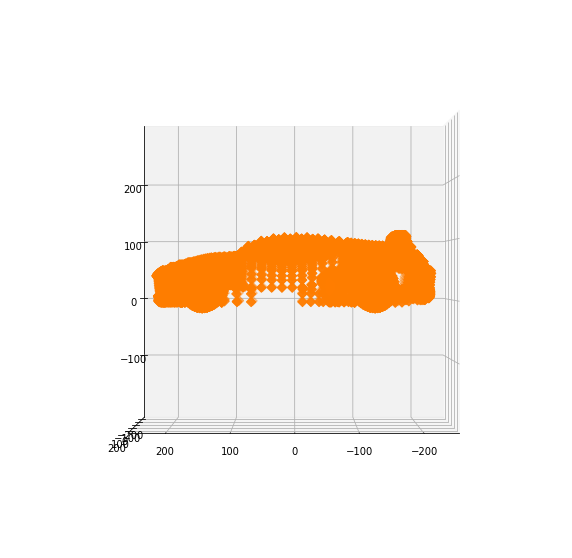

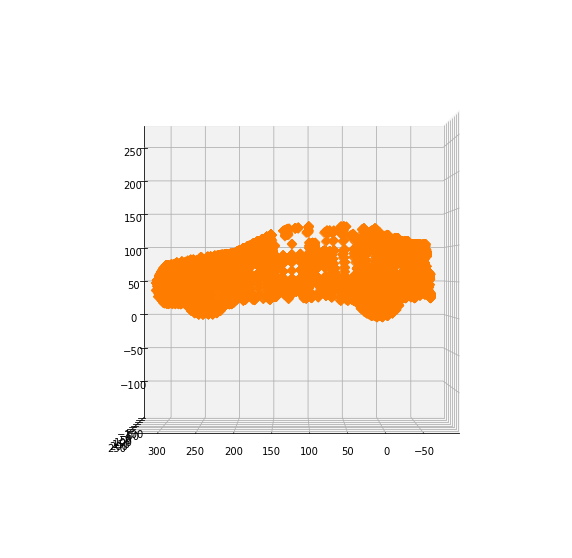

In [56]:
from pyntcloud import PyntCloud
car1 = PyntCloud.from_file("dataset/modelnet40_off_aligned/car/train/car_0082.ply")
car1.plot()
car2 = PyntCloud.from_file("dataset/modelnet40_off_aligned/car/train/car_0108.ply")
car2.plot()